# Linear Regression

In this tutorial we will explore using numpy linear regression using the Ordinary Least Squares method. First, lets import the necessary libraries and datasets.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

Note that we will use one of the sample datasets provided by sklearn. Load and display the first five data points. Refer [this article](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) for more details.

In [23]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df = california_housing.frame

In [25]:
type(df)

pandas.core.frame.DataFrame

Play around with some more attributes and methods of a 'data frame' object. Refer [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [26]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Now that let us convert this dataframe into a numpy array. Keep in mind the structure of the previous dataframe. We will use it to separate the input variables($\mathbf{X}$) and the target variable($\mathbf{y}$).

# Simple Linear Regression

Let us select the `Median income' variable from the dataframe, and try to predict the 'Median house value'. We will store these datapoints in numpy arrays.

Play around with some [methods and attributes of numpy arrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) to familiarise yourself.

In [27]:
X = california_housing.frame['MedInc'].to_numpy()
y = california_housing.frame['MedHouseVal'].to_numpy()

print("X is a ", type(X))
print("The dimensions of X are", X.shape)

X is a  <class 'numpy.ndarray'>
The dimensions of X are (20640,)


In [28]:
X.size

20640

In [29]:
y.size

20640

Normalise the dataset, since each column contains variables of different scales

[Additional exercise]: Prevent any edge cases, such as if one feature has standard deviation = 0.

In [30]:
train_ratio = 0.8
cutoff = int(train_ratio*len(X))
print(cutoff)



16512


In [31]:
#Shiffle the dataset
idx = np.arange(len(X))
support = np.random.shuffle(idx)
X,y=X[idx], y[idx]

In [32]:
x_train, y_train = X[:cutoff], y[:cutoff]
x_test, y_test = X[cutoff:], y[cutoff:]

In [33]:
#Normalize the data now
x_mean = np.mean(x_train)
x_std = np.std(x_train)

print(x_mean,x_std)

3.86081683624031 1.8952385105696945


Seperate the data into a train and test splits. We will fit the model on the trainsplit, and evaluate on the test split.

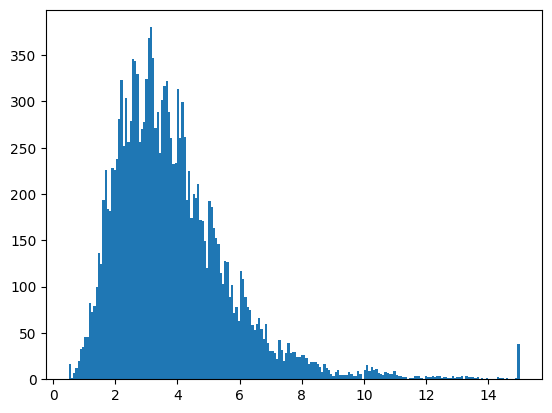

In [34]:
_=plt.hist(x_train, bins=200)

In [35]:
_EPS = 1e-12 #Epsilon to prevent potential dibision by zero
x_train = (x_train -x_mean)/(x_std+_EPS)

In [36]:
x_test = (x_test-x_mean)/(x_std + _EPS)

In [37]:
print(f"New mean={np.mean(x_test)},new std={np.std(x_test)}")

New mean=0.02599716766967596,new std=1.0116461259460998


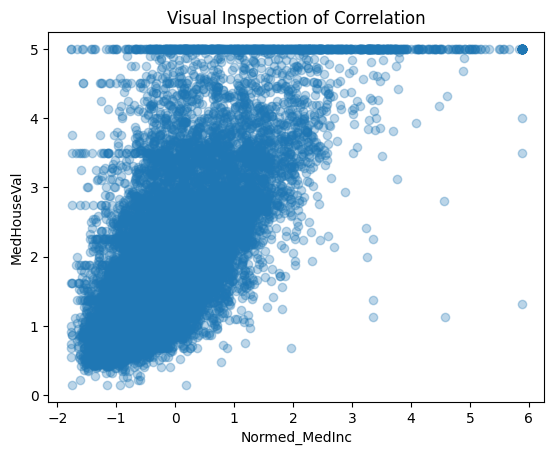

In [38]:
plt.scatter(x_train, y_train, alpha=0.3)
plt.xlabel('Normed_MedInc')
plt.ylabel('MedHouseVal')
plt.title('Visual Inspection of Correlation')
plt.show()

In [10]:
def get_train_split(X,y,train_ratio=0.7):
  """ Normalise the data, and
   split the data set into train and test splits.
   Args:
   train_ratio- the preferred fraction of data used for training
  """
  # Normally mean and std for normalization should be calculated with only data
  # ToDo: Shuffle the data before partitioning.
  cutoff = int(train_ratio*len(X))
  X_train, y_train = X[:cutoff], y[:cutoff]

  x_mean, x_std = np()
  X_test, y_test = X[cutoff:], y[cutoff:]

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_split(X,y, train_ratio =0.7)

Let us visualise our training data. Note that, being "proper" scientists, we do not even want to visualise our test data 😀

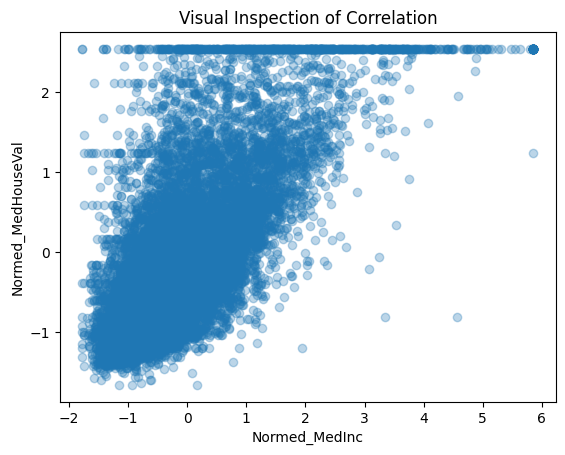

In [ ]:
plt.scatter(X_train, y_train, alpha=0.3)
plt.xlabel('Normed_MedInc')
plt.ylabel('Normed_MedHouseVal')
plt.title('Visual Inspection of Correlation')
plt.show()

Looks like the single variable [Median Income] has some positive correlation with the target [Median House Value]. However, if assume a linear model, there are many outliers, specially towards the higher end of [Median House Value] . Nevertheless, lets try Simple linear regression(Uni-variate input) as a precursor for Multi-variate Linear Regression.

# Lets model our Hypothesis and Loss
Consider the vector of labels $ \mathbf{y} \in \mathbb{R}^{m \times 1}$.

A single data point of independent variables is $\mathbf{x} \in \mathbb{R}^{n \times 1}$, and the set of $m$ such data points is $, \mathbf{X} \in \mathbb{R}^{m \times n}$. Each datapoint is in a row of $\mathbf{X}$.

\
The parameters that need to be estimated are in the vector
$ \mathbf{\Theta} \in \mathbb{R}^{n \times 1} $.


We have the vectorized form of the linear model as:

$\mathbf{y}_{m \times 1} = \mathbf{X}_{ m \times n} \mathbf{\Theta}_{ n \times 1} + \eta$


Each element in $\mathbf{y}$ is the dot product between the input vector and the parameters:
$\hat{y}_{i} = \mathbf{x}^{T} \hat{\mathbf{\Theta}}  = \hat{\theta_{0}} + \hat{\theta_{1}}x_1 $.
We include an intercept term $\theta_{0}$, therefore our parameter search will be across a 2D plane.

\
The commonly used loss function for our predictions will be MSE.

$L_{MSE}(\hat{\mathbf{\Theta}}) = \frac{1}{2m} \sum_{i=1}^{m} (y_{i} - \hat{y}_{i})^2  = \frac{1}{2m} (\mathbf{y-\hat{y}})^T (\mathbf{y-\hat{y}})$

In [ ]:
def get_rearranged_data(X, y):
  """Arrange the data to match the mathematical model
  Args:
  X - An array of independent data without any padding
  y - A vector of labels corresponding to X

  Returns:
  X_reshaped - 2D array of independent data
  X_padded   - 2D array of independent data padded with extra column of ones
  y_reshaped - The label vector reshaped into a 2D array

  """
  m = np.size(y)
  n = np.size(X[0])
  X_reshaped = X.reshape([m,n])
  y_reshaped = y.reshape([m,1])

  # Pad X_reshaped with a column of ones for the intercept variable
  X_padded = np.hstack([np.ones_like(X_reshaped),X_reshaped])

  return X_reshaped,X_padded,y_reshaped

X_reshaped,X_padded,y_reshaped = get_rearranged_data(X_train, y_train)

print(X_padded.shape)
print(X_padded[:4,:])

(15000, 2)
[[1.         2.34476576]
 [1.         2.33223796]
 [1.         1.7826994 ]
 [1.         0.93296751]]


In [41]:
x_train_padded = np.hstack([np.ones_like(x_train).reshape((-1,1)), x_train.reshape((-1,1))])

In [42]:
x_train_padded.shape

(16512, 2)

In [43]:
x_train_padded[5]

array([1.        , 0.45529001])

In [ ]:
def get_loss(X_padded,y_reshaped,theta):
  """ Define the loss function
    Args:
    X_padded  - A 2D array of the independent datapoints padded with a colunmn of ones
    y_reshaped- A 2D array of the dependent variable
    theta     - The parameter vector
  """
  m = np.size(y_reshaped)
  j = np.sum(((X_padded@theta)-y_reshaped)**2)/(2*m)
  return j

If our code is correct, we should expect an apprximately-convex shape for the loss function.

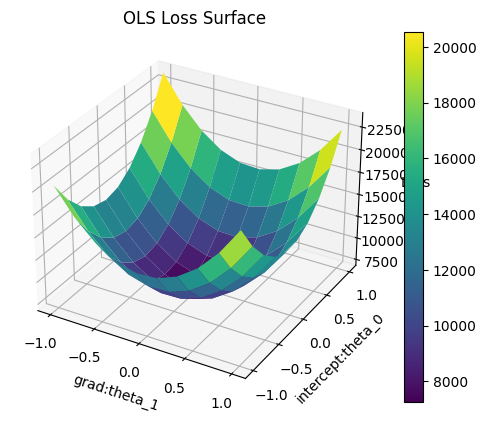

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
gradient_range = np.linspace(-1, 1, 10)
intercept_range = np.linspace(-1, 1, 10)

# Create a meshgrid for gradient and intercept values
G, I = np.meshgrid(gradient_range, intercept_range)

# Calculate the loss for different gradient and intercept combinations
loss = np.zeros_like(G)
for i in range(gradient_range.shape[0]):
    for j in range(intercept_range.shape[0]):
        loss[i,j] = get_loss(X_padded,y_reshaped, np.array([I[i,j],G[i,j]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
surf = ax.plot_surface(G, I, loss, cmap='viridis')
ax.set_xlabel('grad:theta_1')
ax.set_ylabel('intercept:theta_0')
ax.set_zlabel('Loss')
ax.set_title('OLS Loss Surface')

fig.colorbar(surf)
plt.show()

# Estimators for the parameter vector

We start with the following optimization problem:
$ \hat{\Theta} = \underset{\Theta} {argmin} \quad ( L_{MSE}(\Theta ))  $.

This results in an expression for the Ordinary Least Squares (OLS) estimator for the parameter vector:
$\hat{\Theta}_{OLS} = (X^T X)^{-1} X^T \mathbf{y}$

In [ ]:
y_reshaped =
def ols_estimator(X,y):
  """  Returns the OLS estimator coefficient vector
  Args:
  X  - A 2D array of the independent datapoints padded with a colunmn of ones
  y  - A 2D array of the dependent variable
  """
  theta_hat = np.linalg.pinv(X.transpose() @ X) @ X.transpose() @ y

  return theta_hat

print(ols_estimator(X_padded, y_reshaped))

[[-0.04527321]
 [ 0.67787118]]


In class we discuss some disadvantages of the OLS estimator, such as being prone to overfitting, and affected by outliers. Therefore we should reflect this in our loss function, and try to find more "outlier robust" estimators.

Extending the loss function to include a regularization term, we can define more general class of loss functions.
$L_{Ridge}(\hat{\mathbf{\Theta}}) = \frac{1}{2m} \sum_{i=1}^{m} (y_{i} - \hat{y}_{i})^2 + \lambda |\hat{\mathbf{\Theta}}|_2^{2}  \quad = \frac{1}{2m} (\mathbf{y-\hat{y}})^T (\mathbf{y-\hat{y}}) + \lambda \hat{\mathbf{\Theta}}^T \hat{\mathbf{\Theta}} $.

\
The hyperparameter $\lambda$ is the regularization parameter, and controls the extent of the L2 penalty in the overall loss. Solving for $\underset{\Theta} {argmin} \quad ( L_{Ridge}(\Theta ))$  results in the following Ridge regression estimator:
$\hat{\Theta}_{Ridge} = (X^T X + \lambda I)^{-1} X^T \mathbf{y}$



In [ ]:
def ridge_estimator(X,y,lamda):
  """ Returns the Ridge regression estimator coefficient vector
  Args:
  X  - A 2D array of the independent datapoints padded with a colunmn of ones
  y  - A 2D array of the dependent variable
  lamda - The shrinkage hyper-parameter
  """
  n = np.size(X[0])
  theta_hat = np.linalg.pinv(X.transpose() @ X + lamda*np.eye(n)) @ X.transpose() @ y

  return theta_hat

print(ridge_estimator(X_padded, y_reshaped, 1))

[[-0.04527195]
 [ 0.67782571]]


In [ ]:
# Check if your functions are correct:
print(ridge_estimator(X_padded, y_reshaped, lamda=0))
print(ols_estimator(X_padded, y_reshaped))

[[-0.04527321]
 [ 0.67787118]]
[[-0.04527321]
 [ 0.67787118]]


Visualise any differences between the predictions when the regularization parameter is changed.

estimate for lambda = 0.01: 
 [[-0.0452732 ]
 [ 0.67787072]]
estimate for lambda = 0.10: 
 [[-0.04527308]
 [ 0.67786663]]
estimate for lambda = 1.00: 
 [[-0.04527195]
 [ 0.67782571]]
estimate for lambda = 10.00: 
 [[-0.04526067]
 [ 0.67741678]]


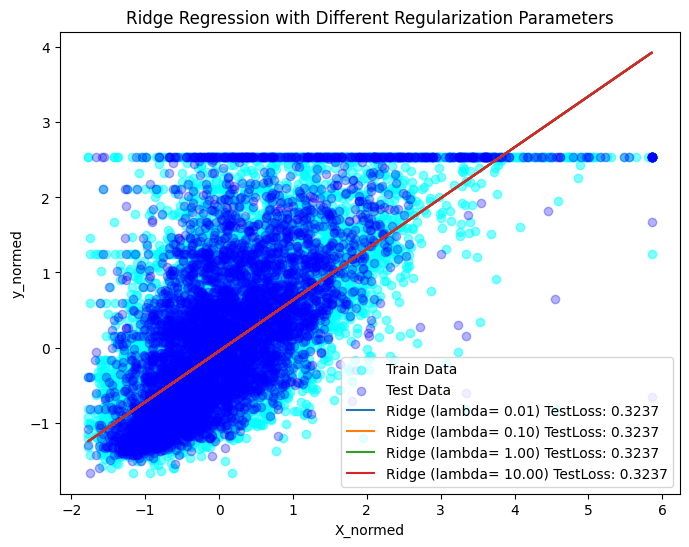

In [ ]:
lambdas = [0.01, 0.1, 1.0, 10.0]
X_reshaped_test,X_padded_test,y_reshaped_test = get_rearranged_data(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Train Data', color='cyan',alpha=0.5)
plt.scatter(X_test, y_test, label='Test Data', color='blue',alpha=0.3)

for lam in lambdas:
    ridge_theta = ridge_estimator(X_padded, y_reshaped, lamda=lam)
    y_pred = X_padded @ ridge_theta
    test_loss = get_loss(X_padded_test, y_reshaped_test, ridge_theta)
    print('estimate for lambda = %.2f: \n'%(lam), ridge_theta)
    plt.plot(X_train, y_pred, label='Ridge (lambda= %.2f) TestLoss: %.4f'%(lam, test_loss))

plt.xlabel('X_normed')
plt.ylabel('y_normed')
plt.title('Ridge Regression with Different Regularization Parameters')
plt.legend()
plt.show()

Use a library from [sklearn ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ) to get the same estimators, and check with our coded solution.

* Note that the input for the .fit() method does not necessitate a manual padding of data for the intercept. We can use the `fit_intercept' argument instead.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(X_reshaped, y_reshaped)
print(reg.coef_)
print(reg.intercept_)

[[0.67787118]]
[-0.04527321]




*   We selected only one variable from the initial data to try and predict the Median house value.
*   We tried various degrees of ridge regression. But the estimators are almost the same in each case.
*   One can sense that one variable is insufficient for a meaningful linear regression.



# Multivariate Linear Regression


In [ ]:
X = california_housing.frame.drop(['MedHouseVal'],axis='columns').to_numpy()
y = california_housing.frame['MedHouseVal'].to_numpy()

print("X is a ", type(X))
print("The dimensions of X are", X.shape)

X is a  <class 'numpy.ndarray'>
The dimensions of X are (20640, 8)


Now repeat the previous steps we did for the uni-variate regression.